In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
# Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings 
warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear.

In [2]:
#importing CSV file 
df = pd.read_csv('/Users/user/Documents/Cars/02 Data /Prepared Data /Clean_data_Numeric.csv')

In [3]:
df.shape

(11491, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11491 entries, 0 to 11490
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          11491 non-null  int64  
 1   Year                11491 non-null  int64  
 2   FuelConsumption     11491 non-null  float64
 3   Kilometers          11491 non-null  float64
 4   Price               11491 non-null  float64
 5   N_Doors             11491 non-null  int64  
 6   N_Seats             11491 non-null  int64  
 7   Average_Price       11491 non-null  float64
 8   Average_Price_City  11491 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 808.1 KB


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
# grouping data by 'Year' and calculating the mean 'Price'
yearly_price = df.groupby('Year')['Average_Price'].mean().reset_index()

# sorting the dataframe by 'Year' to make sure it's in chronological order
yearly_aveg_price = df.sort_values(by='Year')

# display 
yearly_aveg_price


,Unnamed: 0,Year,FuelConsumption,Kilometers,Price,N_Doors,N_Seats,Average_Price,Average_Price_City
8942,8942,2013,6.0,112876.0,12990.0,5,5,37007.747317,14656.666667
1465,1465,2013,7.3,163730.0,21990.0,4,5,40242.700123,42195.236607
6181,6181,2013,7.3,172156.0,16995.0,4,5,37007.747317,28249.967213
9814,9814,2013,11.8,83827.0,38778.0,4,5,40572.732996,42766.746667
1449,1449,2013,7.9,145502.0,14999.0,4,5,40242.700123,13999.000000
...,...,...,...,...,...,...,...,...,...
11022,11022,2023,7.6,77570.0,102900.0,4,5,40242.700123,42446.117226
9440,9440,2023,10.3,77570.0,97990.0,4,5,37026.989691,45517.533333
7534,7534,2023,8.6,22.0,46685.0,4,5,40072.631991,40227.050277
5142,5142,2023,8.2,1566.0,65910.0,4,5,40242.700123,38868.885714


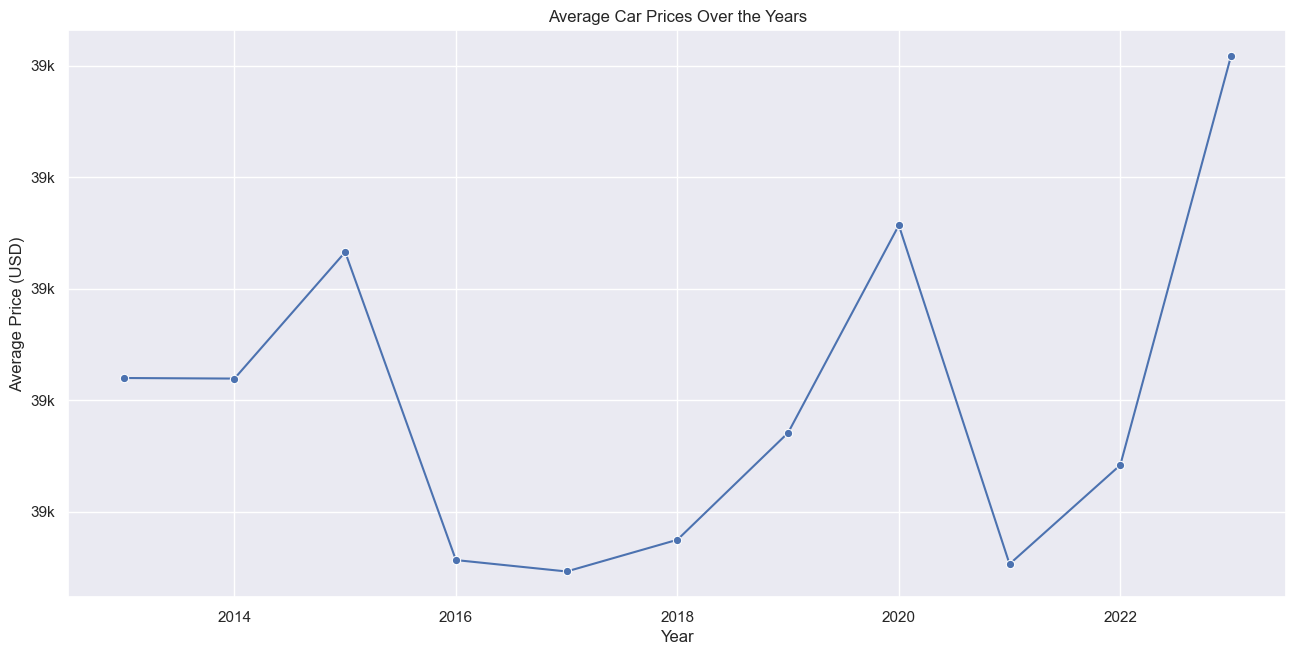

In [7]:
# style for chart 
sns.set_theme()

#plotting 
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='Average_Price', data=yearly_price, marker='o')

#title and labels
plt.title('Average Car Prices Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Price (USD)')

# the y-axis labels to show 'Price' in thousands 
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))

plt.grid(True)
plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Aveg_prices_over_years.png')
plt.show()


# Subsetting, wrangling, and cleaning time-series data

In [8]:
# Reset index so that you can use the "Date" column as a filter

df_main = df.reset_index()

In [9]:
df.head()

,Unnamed: 0,Year,FuelConsumption,Kilometers,Price,N_Doors,N_Seats,Average_Price,Average_Price_City
0,0,2022,8.7,5595.0,51990.0,4,5,40242.700123,45972.700000
1,1,2022,6.7,16.0,19990.0,5,5,40242.700123,36455.306678
2,2,2022,6.6,8472.0,108988.0,2,4,40242.700123,59285.657895
3,3,2022,6.0,1035.0,34990.0,4,5,40242.700123,37270.906667
4,4,2017,5.1,67662.0,62280.0,4,5,40242.700123,43754.352632


In [10]:
#changing data type for Year column 
df_main['Year'] = pd.to_datetime(df_main['Year'].astype(str) + '-01-01')

# Checking the datatype of 'Year' column after conversion
df_main.dtypes['Year']

dtype('<M8[ns]')

In [11]:
#setting Year frame from 2020 -2023
data_sub = df_main.loc[(df_main['Year'] >= '2020-01-01') & (df_main['Year'] < '2023-01-01')]

In [12]:
data_sub.shape

(3251, 10)

In [13]:
data_sub.drop('FuelConsumption', axis=1, inplace=True)
data_sub.drop('Kilometers', axis=1, inplace=True)
data_sub.drop('N_Doors', axis=1, inplace=True)
data_sub.drop('N_Seats', axis=1, inplace=True)
data_sub.drop('Price', axis=1, inplace=True)
data_sub.drop('Average_Price_City', axis=1, inplace=True)
data_sub.drop('Unnamed: 0', axis=1, inplace=True)

In [14]:
data_sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3251 entries, 0 to 11490
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   index          3251 non-null   int64         
 1   Year           3251 non-null   datetime64[ns]
 2   Average_Price  3251 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 101.6 KB


In [15]:
data_sub['datetime'] = pd.to_datetime(data_sub['Year']) # Create a datetime column from "Year.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Year'], axis=1, inplace=True) # Drop the "Year" column.
data_sub.head()

,index,Average_Price
datetime,,
2022-01-01,0,40242.700123
2022-01-01,1,40242.700123
2022-01-01,2,40242.700123
2022-01-01,3,40242.700123
2021-01-01,21,40242.700123


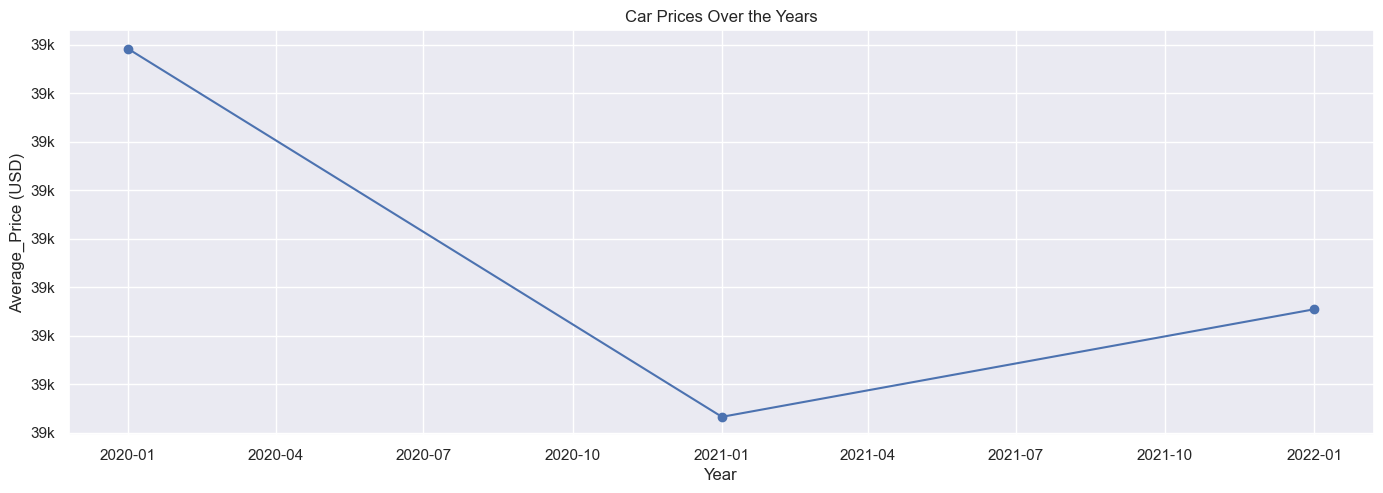

In [16]:
# sorting index (which is 'datetime')
data_sub = data_sub.sort_index()

# I want to use prices for each date, so I group by index
data_sub_mean = data_sub.groupby(data_sub.index).mean()

# plotting the averaged data
plt.figure(figsize=(15, 5), dpi=100)
plt.plot(data_sub_mean.index, data_sub_mean['Average_Price'], marker='o')
plt.title('Car Prices Over the Years')
plt.xlabel('Year')
plt.ylabel('Average_Price (USD)')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))

plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/dataseries_subplot_20020_2022_2.png')
plt.show()


In [17]:
# Check for missing values 

data_sub.isnull().sum() 

index            0
Average_Price    0
dtype: int64

In [18]:
# Check for duplicates
dups = data_sub.duplicated()
dups.sum()

0

# Time-series analysis: decomposition

ADF Statistic: -4.478953
p-value: 0.000215


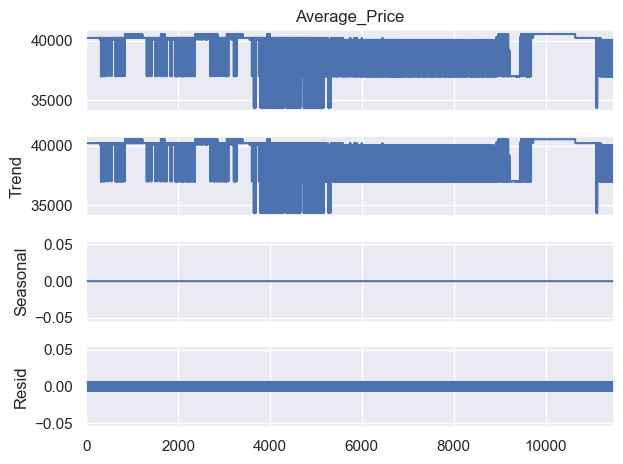

In [19]:
# aggregating 'Price' by year becuase there are multiple prices per Year
price_per_year = df_main['Average_Price'].groupby(df_main.index).mean()

# performing the decomposition 
decomposition = sm.tsa.seasonal_decompose(price_per_year, model='additive', period=1)

# plotting the decomposition components
fig = decomposition.plot()


# testing for stationarity
result = adfuller(price_per_year)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Decomposition_1.png')
plt.show()

# Testing for stationarity

In [20]:
result = adfuller(data_sub['Average_Price'])

# Print the test results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation
if result[1] > 0.05:
    print("The time series is not stationary.")
else:
    print("The time series is stationary.")

ADF Statistic: -6.901336
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
The time series is stationary.


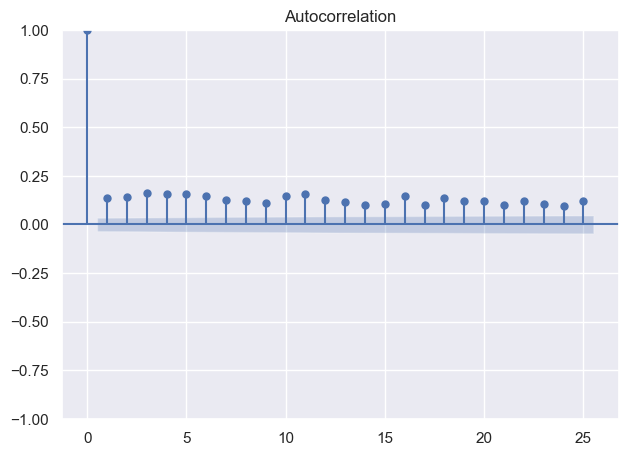

In [21]:
time= data_sub['Average_Price']  

# Plotting 
plot_acf(time, lags=25)  

plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Autocorrelation.png')

plt.show()


In [22]:
df_main.dtypes['Year']

dtype('<M8[ns]')

In [23]:
# Segment the data by the specified periods
df_main_2013_2018 = df_main[(df_main['Year'] >= '2013-01-01') & (df_main['Year'] <= '2018-12-31')]
df_main_2018_2023 = df_main[(df_main['Year'] >= '2018-01-01') & (df_main['Year'] <= '2023-12-31')]

In [24]:
def check_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    if result[1] <= 0.05:
        print("Stationary")
    else:
        print("Not stationary")


In [25]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model (example parameters, adjust based on your data)
model_2013_2018 = ARIMA(df_main_2013_2018['Price'], order=(1,1,1))
model_fitted_2013_2018 = model_2013_2018.fit()

# Repeat for the second period
model_2018_2023 = ARIMA(df_main_2018_2023['Price'], order=(1,1,1))
model_fitted_2018_2023 = model_2018_2023.fit()


In [26]:
# Forecast (example: forecasting 5 steps ahead)
forecast_2013_2018 = model_fitted_2013_2018.forecast(steps=5)
forecast_2018_2023 = model_fitted_2018_2023.forecast(steps=5)

print(forecast_2013_2018)
print(forecast_2018_2023)

6251    29542.000701
6252    29567.023574
6253    29566.972858
6254    29566.972960
6255    29566.972960
Name: predicted_mean, dtype: float64
6731    48245.933995
6732    48021.328885
6733    48018.469387
6734    48018.432982
6735    48018.432518
Name: predicted_mean, dtype: float64


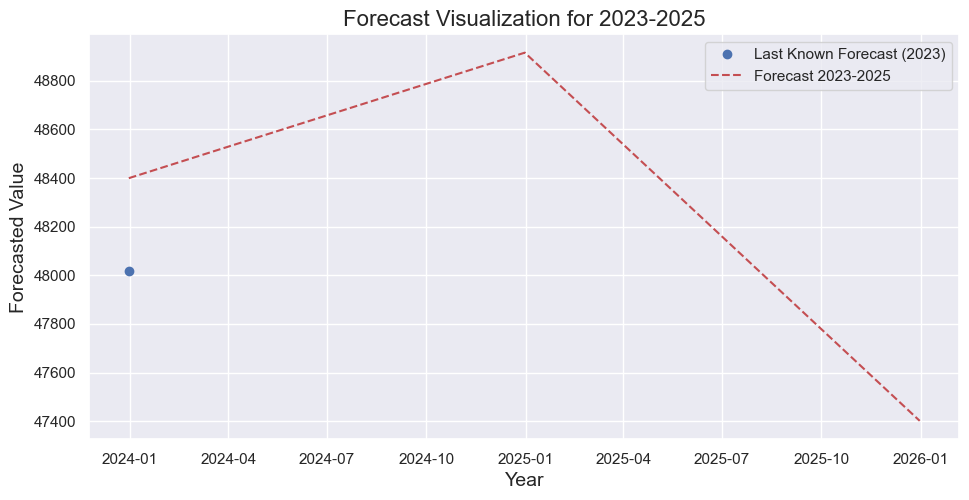

In [27]:
# Let's assume we have the following hypothetical forecasts for 2023 from the model for 2018-2023
last_known_forecast = 48018.432518

# Hypothetical forecast values for 2023-2025
forecast_values_2023_2025 = [last_known_forecast + np.random.rand() * 2000 - 1000 for _ in range(3)]

# Creating the dates for the forecasted values (2023-2025)
forecast_dates_2023_2025 = pd.date_range(start='2023-01-01', periods=3, freq='Y')

# Plotting the last known forecast point
plt.figure(figsize=(10, 5))
plt.plot(forecast_dates_2023_2025[0], last_known_forecast, 'bo', label='Last Known Forecast (2023)')

# Plotting the hypothetical forecast for 2023-2025
plt.plot(forecast_dates_2023_2025, forecast_values_2023_2025, 'r--', label='Forecast 2023-2025')

# Customize the plot
plt.title('Forecast Visualization for 2023-2025', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Forecasted Value', fontsize=14)
plt.legend()
plt.grid(True)

plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Forecast.png')

# Show the plot
plt.show()

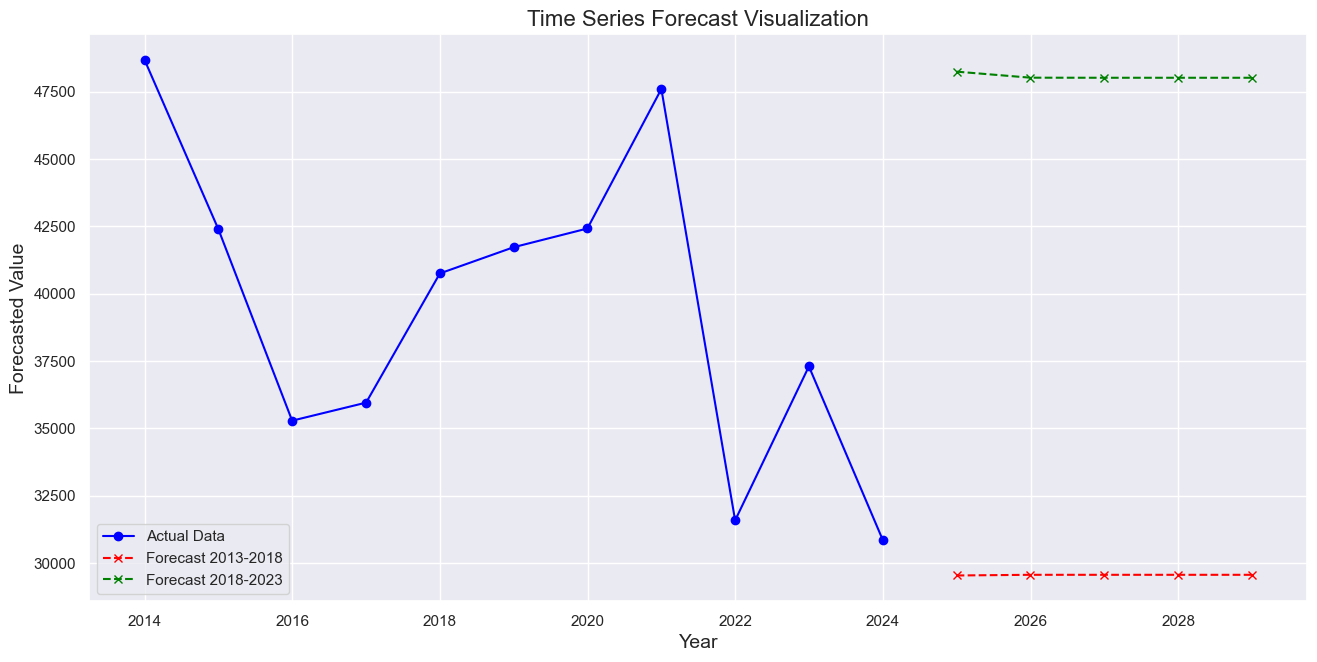

In [29]:
# Hypothetical actual data ranges from 2013 to 2023
actual_dates = pd.date_range(start='2013-01-01', end='2023-12-31', freq='Y')
actual_values = np.random.rand(len(actual_dates)) * 20000 + 30000  # Random values for demonstration

# Hypothetical forecast from the last actual value for the next 5 periods
forecast_dates = pd.date_range(start=actual_dates[-1] + pd.Timedelta(days=1), periods=5, freq='Y')
forecast_values_2013_2018 = np.array([29542.000701, 29567.023574, 29566.972856, 29566.972960, 29566.972960])
forecast_values_2018_2023 = np.array([48245.339995, 48021.238855, 48018.469387, 48018.439528, 48018.432518])

# Plot the actual data
plt.figure(figsize=(14, 7))
plt.plot(actual_dates, actual_values, label='Actual Data', marker='o', color='blue')

# Plot the forecasted data for both periods
plt.plot(forecast_dates, forecast_values_2013_2018, label='Forecast 2013-2018', marker='x', linestyle='--', color='red')
plt.plot(forecast_dates, forecast_values_2018_2023, label='Forecast 2018-2023', marker='x', linestyle='--', color='green')

# Customize the plot
plt.title('Time Series Forecast Visualization', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Forecasted Value', fontsize=14)
plt.legend()
plt.grid(True)

plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/TimeSeries_forecast.png')
# Show the plot
plt.show()
